## CNN - AlexNet
- 2012년 개최된 ILSVRC(ImageNet Large Scale Visual Recognition Challenge) 대회의 우승을 차지한 CNN 구조의 네트워크
- CNN의 부흥에 큰 역할을 했으며, 발표 논문의 첫 저자인 Alex Khrizevsky의 이름을 따 AlexNet
- 합성곱 계층과 풀링 계층을 반복하며 마지막엔 완전연결 계층을 거쳐 결과 출력
- CNN의 다른 대표 모델들과의 구조적인 틀에서 크게 다르지 않지만 AlexNet만 다음
    - Local Response Normalization(국소 정규화) 계층 사용
    - ReLU 활성화 함수 사용
    - Dropout 사용
-

In [6]:
import numpy as np                                # numpy를 불러와서 np라고 부르기
import pandas as pd                                # pandas를 불러와서 pd라고 부르기
import matplotlib.pyplot as plt                      # matplotlib의 그래프 도구를 불러와서 plt라고 부르기
# Jupyter 노트북에서 그래프를 바로 화면에 출력하기 위한 설정
%matplotlib inline
import seaborn as sns                              # seaborn 을 불러와서 sns라고 부르기

from sklearn.utils import shuffle                     # 데이터를 무작위로 섞기 위한 함수

import tensorflow as tf                             # 텐서플로 전체를 tf라는 이름으로 불러오기
from tensorflow import keras                       # 텐서플로 안에 있는 케라스 불러오기
from keras.layers import Dropout, MaxPool2D, Dense, Conv2D, Flatten, BatchNormalization,GlobalAveragePooling2D
                                                    # 딥러닝 모델을 만들 때 사용할 다양한 신경망 구성 요소들 불러오기
from keras.models import Sequential
               # 모델을 차곡차곡 쌓기 위한 클래스 -> Sequential은 위에서 불러온 구성 요소들을 순서대로 차례차례 쌓아올릴 수 있게 해주는 구조
from keras.callbacks import EarlyStopping
# 학습을 조기 종료하는 기능(EarlyStopping은 모델이 더 이상 좋아지지 않을 때 학습을 자동으로 멈추게 해주는 기능)
from keras.applications.mobilenet import MobileNet                                  # 사전학습된 MobileNet 모델 불러오기
from sklearn.metrics import confusion_matrix,classification_report                     # 성능 평가 지표

from skimage.transform import resize               # 이미지 크기를 조절하는 함수
import cv2                                         # 이미지 처리 도구 OpenCV

from tqdm import tqdm                           # 진행률 표시줄
import gc                                         # 메모리 정리를 위한 도구 (garbage collector)


### 위의 실습 코드 - AlexNet

#### 각 라이브러리 설명
- numpy, pandas -> 데이터 처리
- matplotlib.pyplot, seaborn -> 데이터 시각화
- sklearn.utils.shuffle -> 데이터를 랜덤하게 섞는 함수
- tensorflow.keras -> 신경망 모델 구현
- cv2 (OpenVC), skimage.transform.resize -> 이미지 변환 및 크기 조정
- tqdm -> 코드 실행 진행 상황을 시각적으로 확인

In [11]:
alexnet_img_size = (227, 227, 3) # 입력 크기 (227, 227, 3)
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

no_of_images = 2000

x_train = x_train[:no_of_images]
y_train = y_train[:no_of_images]
x_test = x_test[:int(no_of_images)]
y_test = y_test[:int(no_of_images)]

# print(x_train)
# print(y_train)
# print(x_test)
# print(y_test)

In [10]:
# # 중간에서 선택 -직접 정의했을 경우
# x_train = x_train[1000:3000]
#
# print(x_train)
#
# # 중간에서 선택 - 87페이지처럼 앞에서 정의
# start_idx = 1000
# end_idx = 3000
# x_train = x_train[start_idx:end_idx] # 1000번째부터 3000번째까지
#
# print(x_train)

[]
[]


In [13]:
# Shape of Dataset
test_shape = np.shape(x_test)
train_shape = np.shape(x_train)

print("Shape of Test Dataset: ", test_shape)
print("Shape of Train Dataset: ", train_shape)

Shape of Test Dataset:  (2000, 28, 28)
Shape of Train Dataset:  (2000, 28, 28)


Loading train data for AlexNet : 


TypeError: only integer scalar arrays can be converted to a scalar index

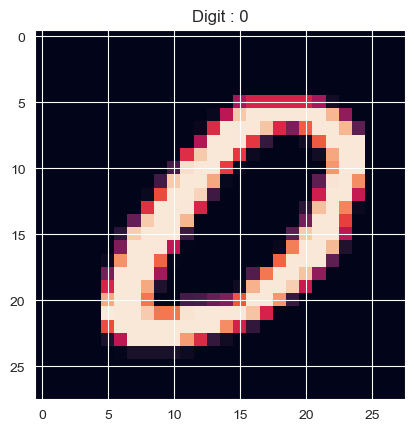

In [51]:
n = np.random.randint(0, train_shape[0]) # 랜덤한 숫자 선택
sample = x_train[n]

plt.imshow(sample) # MNIST 숫자 이미지를 시각화
plt.title('Digit : ' + str(y_train[n])) # 해당 이미지의 라벨 출력

In [54]:
# 이미지 크기 조정 함수
def resize_images(images, img_size):
    resized_images = []

    for i in tqdm(range(len(images))):
        img = cv2.cvtColor(images[i], cv2.COLOR_GRAY2RGB)
        resized_images.append(resize(img, img_size, mode='constant'))

    return np.array(resized_images, dtype ='float32')

print('Loading train data for AlexNet : ')
alex_train = resize_images(x_train, alexnet_img_size)

print('Loading test data for AlexNet : ')
alex_test = resize_images(x_test, alexnet_img_size)

Loading train data for AlexNet : 


100%|██████████| 2000/2000 [00:17<00:00, 112.69it/s]


Loading test data for AlexNet : 


100%|██████████| 2000/2000 [00:17<00:00, 112.77it/s]


Text(0.5, 1.0, 'Digit : 5')

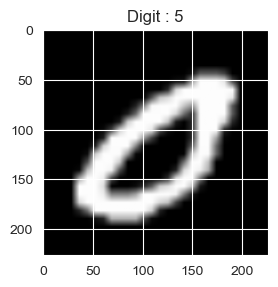

In [58]:
# 데이터 셔플 및 검증 데이터 분할
alex_train, alex_train_labels = shuffle(alex_train, y_train, random_state=10)

alex_val, alex_val_labels = alex_train[:int(no_of_images/5)], alex_train_labels[:int(no_of_images/5)]

alex_sample = alex_train[n]

plt.subplot(1, 2, 1)
plt.imshow(alex_sample)
plt.title('Digit : ' + str(alex_train_labels[n]))
